In [1]:
import pandas as pd
import numpy as np

In [2]:
counties = pd.read_csv('counties_WI.csv')
counties.set_index('FIPS Code', inplace = True)
counties.head()

,County Name
FIPS Code,
1,ADAMS
3,ASHLAND
5,BARRON
7,BAYFIELD
9,BROWN


In [3]:
df = pd.read_csv('wisconisin_census.csv')
df.head()

,SUMLEV,STATE,COUNTY,PLACE,COUSUB,CONCIT,PRIMGEO_FLAG,FUNCSTAT,NAME,STNAME,...,POPESTIMATE2010,POPESTIMATE2011,POPESTIMATE2012,POPESTIMATE2013,POPESTIMATE2014,POPESTIMATE2015,POPESTIMATE2016,POPESTIMATE2017,POPESTIMATE2018,POPESTIMATE2019
0,40,55,0,0,0,0,0,A,Wisconsin,Wisconsin,...,5690475,5705288,5719960,5736754,5751525,5760940,5772628,5790186,5807406,5822434
1,162,55,0,100,0,0,0,A,Abbotsford city,Wisconsin,...,2299,2301,2275,2278,2264,2250,2245,2248,2253,2233
2,162,55,0,275,0,0,0,A,Adams city,Wisconsin,...,1972,1952,1924,1917,1888,1878,1877,1867,1890,1893
3,162,55,0,450,0,0,0,A,Adell village,Wisconsin,...,521,519,516,520,519,520,519,515,513,512
4,162,55,0,750,0,0,0,A,Albany village,Wisconsin,...,1018,1014,1010,1013,1007,1006,998,1000,995,993


In [4]:
df1 = df.drop(columns = ['SUMLEV','STATE','PLACE','COUSUB','CONCIT','PRIMGEO_FLAG','FUNCSTAT',
                         'ESTIMATESBASE2010', 'POPESTIMATE2010', 'POPESTIMATE2011',
                           'POPESTIMATE2012', 'POPESTIMATE2013', 'POPESTIMATE2014',
                           'POPESTIMATE2015', 'POPESTIMATE2016', 'POPESTIMATE2017',
                           'POPESTIMATE2018'])

In [5]:
df1 = df1[~(df1['CENSUS2010POP'] == 'A')]

In [6]:
df1 = df1.astype({'CENSUS2010POP':int}) 

There are some repeated cities and towns. Some towns and cities are repeated because either they are located in two different counties or there are two or more towns or cities with the same name. There is also the posibility that they are repeated because of some administrative reason.

In the case that the entry is repeated because some administrative reason, I have to remove the repeated entries. In the case that the name is repeated because they are in two or more different, then I think the best is to check if the population is the same. If that is the case, then delete one of the two entries.

There is also the case where the name is repeated but it the second time it has a flag (pt.). I have to check if the name with flag and the name without flag have the same population.

In [7]:
dfpt = df1[df1['NAME'].str.contains('\(pt\.\)')]

In [8]:
counts = 0
for index, row in dfpt.iterrows():
    name = row['NAME'][0:-6]
    place = df1[(df1['NAME'] == name) & (df1['COUNTY'] == row['COUNTY'])][['CENSUS2010POP', 'POPESTIMATE2019']]
    if not((place['CENSUS2010POP'].values == row['CENSUS2010POP']) and (place['POPESTIMATE2019'].values == row['POPESTIMATE2019'])):
        count += 1

print(counts)

0


Since there is no difference between name + (pt.) and name cities, then I will delete the ones with (pt.)

In [9]:
df1 = df1[~(df1['NAME'].str.contains('\(pt\.\)'))]

County = 0 is used for administrative purposes, then it will be deleted

In [10]:
df1 = df1[~(df1['COUNTY'] == 0)]

In [11]:
df1.head()

,COUNTY,NAME,STNAME,CENSUS2010POP,POPESTIMATE2019
602,1,Adams County,Wisconsin,20875,20220
603,1,Adams city,Wisconsin,1967,1893
604,1,Friendship village,Wisconsin,725,657
606,1,Balance of Adams County,Wisconsin,18122,17620
607,1,Adams city,Wisconsin,1967,1893


There are four types: 'County', 'city', 'village', 'town'

In [12]:
df1['Type'] = df1.apply(lambda row: row['NAME'].split(' ')[-1], axis = 1)

In [13]:
def Name_getter(row):
    n = row['NAME'].split(' ')[0:-1]
    if len(n) > 1:
        n = ' '.join(n)
    else:
        n = n[0]
    return n

df1['Name'] = df1.apply(Name_getter, axis = 1)

In [14]:
df1['County Name'] = counties.loc[df1['COUNTY']].values

In [15]:
countiesPop = df1[df1['Type'] == 'County']
countiesPop.head(6)

,COUNTY,NAME,STNAME,CENSUS2010POP,POPESTIMATE2019,Type,Name,County Name
602,1,Adams County,Wisconsin,20875,20220,County,Adams,ADAMS
606,1,Balance of Adams County,Wisconsin,18122,17620,County,Balance of Adams,ADAMS
630,3,Ashland County,Wisconsin,16157,15562,County,Ashland,ASHLAND
634,3,Balance of Ashland County,Wisconsin,6835,6669,County,Balance of Ashland,ASHLAND
654,5,Barron County,Wisconsin,45870,45244,County,Barron,BARRON
666,5,Balance of Barron County,Wisconsin,25012,24798,County,Balance of Barron,BARRON


In [16]:
townsPop = df1[df1['Type'] == 'town']
townsPop.head()

,COUNTY,NAME,STNAME,CENSUS2010POP,POPESTIMATE2019,Type,Name,County Name
609,1,Adams town,Wisconsin,1345,1321,town,Adams,ADAMS
610,1,Big Flats town,Wisconsin,1018,1005,town,Big Flats,ADAMS
611,1,Colburn town,Wisconsin,223,219,town,Colburn,ADAMS
612,1,Dell Prairie town,Wisconsin,1590,1572,town,Dell Prairie,ADAMS
613,1,Easton town,Wisconsin,1130,1116,town,Easton,ADAMS


In [17]:
civiPop = df1[~(df1['Type'] == 'County') & ~(df1['Type'] == 'town')]
civiPop.head()

,COUNTY,NAME,STNAME,CENSUS2010POP,POPESTIMATE2019,Type,Name,County Name
603,1,Adams city,Wisconsin,1967,1893,city,Adams,ADAMS
604,1,Friendship village,Wisconsin,725,657,village,Friendship,ADAMS
607,1,Adams city,Wisconsin,1967,1893,city,Adams,ADAMS
608,1,Adams city,Wisconsin,1967,1893,city,Adams,ADAMS
614,1,Friendship village,Wisconsin,725,657,village,Friendship,ADAMS


In [18]:
civiPop['address'] = civiPop.apply(lambda row: row['Name'] + ', ' + row['County Name'] + ', wi', axis = 1)

/home/juan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [19]:
civiPop[civiPop['address'] == 'Adams, ADAMS, wi']

,COUNTY,NAME,STNAME,CENSUS2010POP,POPESTIMATE2019,Type,Name,County Name,address
603,1,Adams city,Wisconsin,1967,1893,city,Adams,ADAMS,"Adams, ADAMS, wi"
607,1,Adams city,Wisconsin,1967,1893,city,Adams,ADAMS,"Adams, ADAMS, wi"
608,1,Adams city,Wisconsin,1967,1893,city,Adams,ADAMS,"Adams, ADAMS, wi"


In [20]:
civiPop[civiPop['Name'] == 'Pewaukee']

,COUNTY,NAME,STNAME,CENSUS2010POP,POPESTIMATE2019,Type,Name,County Name,address
3704,133,Pewaukee city,Wisconsin,13195,14631,city,Pewaukee,WAUKESHA,"Pewaukee, WAUKESHA, wi"
3705,133,Pewaukee village,Wisconsin,8166,8113,village,Pewaukee,WAUKESHA,"Pewaukee, WAUKESHA, wi"
3762,133,Pewaukee city,Wisconsin,13195,14631,city,Pewaukee,WAUKESHA,"Pewaukee, WAUKESHA, wi"
3763,133,Pewaukee city,Wisconsin,13195,14631,city,Pewaukee,WAUKESHA,"Pewaukee, WAUKESHA, wi"
3764,133,Pewaukee village,Wisconsin,8166,8113,village,Pewaukee,WAUKESHA,"Pewaukee, WAUKESHA, wi"
3765,133,Pewaukee village,Wisconsin,8166,8113,village,Pewaukee,WAUKESHA,"Pewaukee, WAUKESHA, wi"


In [21]:
civiPop.drop_duplicates(inplace=True)

/home/juan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [22]:
civiPop[civiPop['NAME'] == 'Brooklyn village']

,COUNTY,NAME,STNAME,CENSUS2010POP,POPESTIMATE2019,Type,Name,County Name,address
1196,25,Brooklyn village,Wisconsin,936,990,village,Brooklyn,DANE,"Brooklyn, DANE, wi"
1703,45,Brooklyn village,Wisconsin,465,475,village,Brooklyn,GREEN,"Brooklyn, GREEN, wi"


In [23]:
df2 = civiPop[['address','CENSUS2010POP']].groupby(by = 'address').std()

In [24]:
doubles = df2[~(df2['CENSUS2010POP'].isnull())]

In [25]:
doubles

,CENSUS2010POP
address,
"Pewaukee, WAUKESHA, wi",3556.040003
"Superior, DOUGLAS, wi",18794.898244


In [26]:
for index, row in doubles.iterrows():
    temp = civiPop[civiPop['address'] == index]
    civiPop.loc[civiPop['address'] == index, ['address']] = temp.apply(lambda r: r['Name'] + ' ' + r['Type'] + ', ' + r['County Name'] + ', wi', axis = 1)

/home/juan/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [27]:
civiPop.sort_values(by = 'CENSUS2010POP', ascending = True).head(20)

,COUNTY,NAME,STNAME,CENSUS2010POP,POPESTIMATE2019,Type,Name,County Name,address
1307,27,Columbus city,Wisconsin,0,0,city,Columbus,DODGE,"Columbus, DODGE, wi"
2850,97,Milladore village,Wisconsin,0,0,village,Milladore,PORTAGE,"Milladore, PORTAGE, wi"
720,7,Ashland city,Wisconsin,0,0,city,Ashland,BAYFIELD,"Ashland, BAYFIELD, wi"
1548,39,Kewaskum village,Wisconsin,0,0,village,Kewaskum,FOND DU LAC,"Kewaskum, FOND DU LAC, wi"
3668,131,Milwaukee city,Wisconsin,0,0,city,Milwaukee,WASHINGTON,"Milwaukee, WASHINGTON, wi"
3743,133,Milwaukee city,Wisconsin,0,0,city,Milwaukee,WAUKESHA,"Milwaukee, WAUKESHA, wi"
2629,87,Howard village,Wisconsin,0,0,village,Howard,OUTAGAMIE,"Howard, OUTAGAMIE, wi"
3565,127,Burlington city,Wisconsin,0,5,city,Burlington,WALWORTH,"Burlington, WALWORTH, wi"
1314,27,Hartford city,Wisconsin,0,9,city,Hartford,DODGE,"Hartford, DODGE, wi"
2554,83,Pulaski village,Wisconsin,0,0,village,Pulaski,OCONTO,"Pulaski, OCONTO, wi"


The value of some cities and villages has been divided since the city or village is located in one or more counties. I have to figure out a way to identify the places that have been divided and merge them in one value. One way is to use Beautiful Soup to look into wikipedia which cities are located in more than one county.

In [28]:
countNames = civiPop[['NAME', 'COUNTY']].groupby(by = 'NAME').count()

I have to check in wikipedia each of the following cities

In [29]:
NamesCheck = countNames[countNames['COUNTY'] > 1].index.values

In [30]:
NamesCheck

array(['Abbotsford city', 'Appleton city', 'Ashland city',
       'Bayside village', 'Belleville village', 'Berlin city',
       'Birnamwood village', 'Blanchardville village', 'Brodhead city',
       'Brooklyn village', 'Burlington city', 'Cambridge village',
       'Cazenovia village', 'Colby city', 'Columbus city',
       'Cuba City city', 'De Soto village', 'Dorchester village',
       'Eau Claire city', 'Edgerton city', 'Genoa City village',
       'Hartford city', 'Hazel Green village', 'Howard village',
       'Kewaskum village', 'Kiel city', 'Lac La Belle village',
       'Livingston village', 'Marion city', 'Marshfield city',
       'Menasha city', 'Milladore village', 'Milwaukee city',
       'Montfort village', 'Mukwonago village', 'Muscoda village',
       'New Auburn village', 'New London city', 'Newburg village',
       'Pulaski village', 'Randolph village', 'River Falls city',
       'Spring Valley village', 'Stanley city', 'Turtle Lake village',
       'Unity village', 

In [31]:
cs = []
for n in NamesCheck:
    cs.append(list(civiPop[civiPop['NAME'] == n]['County Name'].values))

In [32]:
dirs = []
for n in NamesCheck:
    dirs.append('https://en.wikipedia.org/wiki/'+'_'.join(n.split(' ')[0:-1])+',_Wisconsin')

This next village has a special wikipedia site different from the rest, then I had to change it

In [33]:
dirs[9] = 'https://en.wikipedia.org/wiki/Brooklyn_(village),_Wisconsin'

The next few lines are just for testing

In [34]:
from urllib.request import urlopen
from bs4 import BeautifulSoup

In [35]:
html = urlopen('https://en.wikipedia.org/wiki/Cazenovia,_Wisconsin')
# html = urlopen('https://en.wikipedia.org/wiki/Bayside,_Wisconsin')
# html = urlopen('https://en.wikipedia.org/wiki/Brodhead,_Wisconsin')
bs = BeautifulSoup(html.read(), 'lxml')

In [36]:
nameList = bs.findAll('div', {'id':'mw-content-text'})
nameList = nameList[0].findAll('table')
nameList = nameList[0].findAll('tr')

In [37]:
for names in nameList:
    sl = names.findAll('td')
    if len(sl):
        if 'Coordinates:' in sl[0].text.strip():
            print(sl[0].text.strip().split('Coordinates:')[1].split('/')[2])

 43.52333; -90.19694


I get the counties of the cities and villages that are located in more than one county

In [38]:
lcounties = []
coors = []
for ind, d in enumerate(dirs):
    print()
    print(ind)
    print(d)
    html = urlopen(d)
    bs = BeautifulSoup(html.read(), 'lxml')
    nameList = bs.findAll('div', {'id':'mw-content-text'})
    nameList = nameList[0].findAll('table')
    nameList = nameList[0].findAll('tr')
    
    for names in nameList:
        sl = names.findAll('td')
        coor = []
        if len(sl):
            if 'Coordinates:' in sl[0].text.strip():
                coor = sl[0].text.strip().split('Coordinates:')[1].split('/')[2].split(';')
                break
    
    for i in range(5,9):
        sl = nameList[i].findAll('td')
        counties = []
        if len(sl):
            if sl[0].text.strip() == 'Wisconsin':
                counties = nameList[i+1].findAll('td')[0].text.split(', ')
                if len(counties) == 1:
                    counties = counties[0].split(' and ')
                if len(counties) == 1:
                    counties = counties[0].split(' & ')
                break
        
    print(counties)
    print(coor)
    lcounties.append(counties)
    coors.append(coor)


0
https://en.wikipedia.org/wiki/Abbotsford,_Wisconsin
['Clark', 'Marathon']
[' 44.94667', ' -90.31833']

1
https://en.wikipedia.org/wiki/Appleton,_Wisconsin
['Outagamie', 'Calumet', 'Winnebago']
[' 44.267', ' -88.400']

2
https://en.wikipedia.org/wiki/Ashland,_Wisconsin
['Ashland', 'Bayfield']
[' 46.59000', ' -90.88000']

3
https://en.wikipedia.org/wiki/Bayside,_Wisconsin
['Milwaukee', 'Ozaukee']
[' 43.18028', ' -87.90472']

4
https://en.wikipedia.org/wiki/Belleville,_Wisconsin
['Dane', 'Green']
[' 42.86167', ' -89.53667']

5
https://en.wikipedia.org/wiki/Berlin,_Wisconsin
['Green Lake', 'Waushara']
[' 43.96972', ' -88.94861']

6
https://en.wikipedia.org/wiki/Birnamwood,_Wisconsin
['Shawano', 'Marathon']
[' 44.93111', ' -89.20972']

7
https://en.wikipedia.org/wiki/Blanchardville,_Wisconsin
['Lafayette', 'Iowa']
[' 42.81028', ' -89.86167']

8
https://en.wikipedia.org/wiki/Brodhead,_Wisconsin
['Green', 'Rock']
[' 42.61861', ' -89.37639']

9
https://en.wikipedia.org/wiki/Brooklyn_(villag

There are a few that were not found, then I have to add them manually

In [39]:
lcounties[9] = ['Dane', 'Green']
lcounties[10] = ['Racine', 'Walworth']
lcounties[18] = ['Chippewa', 'Eau Claire']
lcounties[32] = ['Milwaukee', 'Washington', 'Waukesha']

In [40]:
res = []
for i, j in zip(lcounties, cs):
    res.append(set([ii.casefold() for ii in i]) == set([jj.casefold() for jj in j]))

In [41]:
all(res)

True

All of the names that are repeated represent the same city or village, but it is in two or more counties. Now that this is clear it is necessary to merge the population of the cities that were divided. The county that will represent this cities will be the one with more population.

In [42]:
for names in NamesCheck:
    temp = civiPop[civiPop['NAME'] == names]
    indexes = list(temp.index.values)
    i = temp['CENSUS2010POP'].idxmax()
    civiPop.loc[i, ['CENSUS2010POP', 'POPESTIMATE2019']] = temp['CENSUS2010POP'].sum(), temp['POPESTIMATE2019'].sum()
    indexes.remove(i)
    civiPop = civiPop.drop(indexes)

/home/juan/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [43]:
inds = []
lat = []
lon = []
for i, names in enumerate(NamesCheck):
    inds.append(civiPop[civiPop['NAME'] == names].index.values[0])
    lat.append(float(coors[i][0]))
    lon.append(float(coors[i][1]))

By looking in wikipedia it was also possible to get latitude and longitude for the cities and villages that are located in more than one county. Now, it is necessary to get the latitude and longitude of the cities and villages for the ones that are located in only one county.

In [44]:
NamesNoCheck = countNames[countNames['COUNTY'] == 1].index.values

In [45]:
from geopy.geocoders import Nominatim
geolocator = Nominatim(user_agent="ny_explorer")

In [46]:
civiPopNoRepeat = civiPop[civiPop['NAME'].isin(NamesNoCheck)]

In [47]:
for index, row in civiPopNoRepeat.iterrows():
    location = geolocator.geocode(row['address'])
    if location is None:
        print(index)
    else:
        inds.append(index)
        lat.append(location.latitude)
        lon.append(location.longitude)

717
2906
2908


In [48]:
inds.append(717)
lat.append('46.433678')
lon.append('-91.06204')

inds.append(2906)
lat.append('42.691319')
lon.append('-87.822167')

inds.append(2908)
lat.append('42.764869')
lon.append('-87.780849')

In [52]:
new_lat = []
new_lon = []
for i, row in civiPop.iterrows():
    ii = inds.index(i)
    new_lat.append(lat[ii])
    new_lon.append(lon[ii])

In [55]:
civiPop['Latitude'] = np.array(new_lat, dtype = float)
civiPop['Longitude'] = np.array(new_lon, dtype = float)

In [58]:
civiPop.to_csv('civiPop.csv')

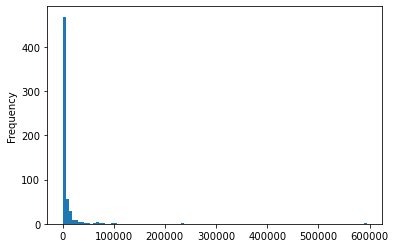

In [65]:
civiPop['CENSUS2010POP'].plot.hist(bins = 100)

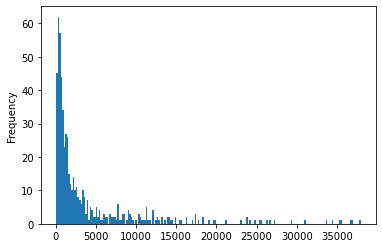

In [74]:
small = civiPop[civiPop['CENSUS2010POP'] < 39000]
hist, bin_edges = np.histogram(small['CENSUS2010POP'], bins = 200)
small['CENSUS2010POP'].plot.hist(bins = 200)

In [72]:
hist

array([45, 62, 57, 44, 34, 23, 27, 26, 15, 12, 10, 14, 10, 11,  8,  7,  6,
       10,  8,  3,  7,  1,  5,  4,  2,  2,  5,  2,  4,  1,  1,  3,  2,  2,
        0,  3,  2,  2,  2,  1,  6,  1,  1,  3,  3,  0,  1,  4,  3,  2,  1,
        0,  1,  0,  3,  2,  1,  1,  1,  5,  1,  1,  0,  4,  0,  1,  2,  1,
        0,  2,  0,  1,  0,  2,  2,  1,  1,  0,  2,  0,  0,  1,  1,  0,  0,
        2,  0,  0,  0,  1,  0,  3,  0,  1,  0,  0,  2,  0,  0,  0,  1,  0,
        0,  1,  1,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  1,  0,  0,  0,  2,  0,  1,  0,  0,  1,  0,  0,  1,  1,  0,
        0,  0,  1,  0,  1,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  1,  0,  0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  1,  0,  0,  0,  0,  1,
        1,  0,  0,  0,  0,  0,  1,  1,  0,  0,  0,  0,  1])

In [73]:
bin_edges

array([   61.   ,   250.295,   439.59 ,   628.885,   818.18 ,  1007.475,
        1196.77 ,  1386.065,  1575.36 ,  1764.655,  1953.95 ,  2143.245,
        2332.54 ,  2521.835,  2711.13 ,  2900.425,  3089.72 ,  3279.015,
        3468.31 ,  3657.605,  3846.9  ,  4036.195,  4225.49 ,  4414.785,
        4604.08 ,  4793.375,  4982.67 ,  5171.965,  5361.26 ,  5550.555,
        5739.85 ,  5929.145,  6118.44 ,  6307.735,  6497.03 ,  6686.325,
        6875.62 ,  7064.915,  7254.21 ,  7443.505,  7632.8  ,  7822.095,
        8011.39 ,  8200.685,  8389.98 ,  8579.275,  8768.57 ,  8957.865,
        9147.16 ,  9336.455,  9525.75 ,  9715.045,  9904.34 , 10093.635,
       10282.93 , 10472.225, 10661.52 , 10850.815, 11040.11 , 11229.405,
       11418.7  , 11607.995, 11797.29 , 11986.585, 12175.88 , 12365.175,
       12554.47 , 12743.765, 12933.06 , 13122.355, 13311.65 , 13500.945,
       13690.24 , 13879.535, 14068.83 , 14258.125, 14447.42 , 14636.715,
       14826.01 , 15015.305, 15204.6  , 15393.895, 